# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
from pprint import pprint
from api_keys import weather_api_key, g_key
import openweathermapy.core as owm
import os
import csv
cities_df = "../output_data/cities.csv"

In [2]:
from citipy import citipy
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

# Print the city count
len(cities)

627

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
temp = []
max_temp = []
humidity = []
wind_speed = []
clouds = []
city_lat = []
city_lon = []
country = []
city_date = []

# Print opening
print("Beginning Data Retrieval")
print("-----------------------------")

# Set up initial values for record and set counts
record_count = 1
set_count = 1

for city in cities:  
    try:
        print(f"Processing Record {record_count} of Set {set_count} | {city.title()}")
        response = requests.get(query_url + city).json()
        
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        city_lat.append(response['coord']['lat'])
        city_lon.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        
    except KeyError:
        print(f"City not found. Skipping...")

    record_count += 1
    if record_count == 51:
        record_count = 1
        set_count += 1
        
# Print closing
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Port Blair
Processing Record 2 of Set 1 | Kakonko
Processing Record 3 of Set 1 | Saint George
Processing Record 4 of Set 1 | Rikitea
Processing Record 5 of Set 1 | Punta Arenas
Processing Record 6 of Set 1 | Hermanus
Processing Record 7 of Set 1 | Staryy Nadym
Processing Record 8 of Set 1 | Cape Town
Processing Record 9 of Set 1 | Hambantota
Processing Record 10 of Set 1 | Saskylakh
Processing Record 11 of Set 1 | Saint-Philippe
Processing Record 12 of Set 1 | East London
Processing Record 13 of Set 1 | Hobart
Processing Record 14 of Set 1 | Chokurdakh
Processing Record 15 of Set 1 | Teluk Nibung
Processing Record 16 of Set 1 | Carnarvon
Processing Record 17 of Set 1 | Vaini
Processing Record 18 of Set 1 | Kodiak
Processing Record 19 of Set 1 | Busselton
Processing Record 20 of Set 1 | Kichmengskiy Gorodok
Processing Record 21 of Set 1 | Kapaa
Processing Record 22 of Set 1 | Kegayli
City not found. Sk

Processing Record 37 of Set 4 | Fort Saint John
City not found. Skipping...
Processing Record 38 of Set 4 | Portland
Processing Record 39 of Set 4 | Umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | Tiznit
Processing Record 41 of Set 4 | Bambous Virieux
Processing Record 42 of Set 4 | Esperance
Processing Record 43 of Set 4 | Bambanglipuro
Processing Record 44 of Set 4 | Caravelas
Processing Record 45 of Set 4 | Santa Isabel
Processing Record 46 of Set 4 | Boyuibe
Processing Record 47 of Set 4 | Sioux Lookout
Processing Record 48 of Set 4 | Ubinskoye
Processing Record 49 of Set 4 | Kirakira
Processing Record 50 of Set 4 | Mansa
Processing Record 1 of Set 5 | Ahuimanu
Processing Record 2 of Set 5 | Amapa
Processing Record 3 of Set 5 | Chicama
Processing Record 4 of Set 5 | Porkhov
Processing Record 5 of Set 5 | Necochea
Processing Record 6 of Set 5 | Yining
Processing Record 7 of Set 5 | Russell
Processing Record 8 of Set 5 | Santa Luzia
Processing Record 9 of Set 5 

Processing Record 23 of Set 8 | Fairbanks
Processing Record 24 of Set 8 | Watrous
Processing Record 25 of Set 8 | Victoria
Processing Record 26 of Set 8 | Teguise
Processing Record 27 of Set 8 | Ojuelos De Jalisco
Processing Record 28 of Set 8 | Balsas
Processing Record 29 of Set 8 | Artyk
City not found. Skipping...
Processing Record 30 of Set 8 | Ancud
Processing Record 31 of Set 8 | Goderich
Processing Record 32 of Set 8 | Miles City
Processing Record 33 of Set 8 | Buala
Processing Record 34 of Set 8 | Carutapera
Processing Record 35 of Set 8 | Rock Springs
Processing Record 36 of Set 8 | Kang
Processing Record 37 of Set 8 | Dingzhou
Processing Record 38 of Set 8 | Qaqortoq
Processing Record 39 of Set 8 | Zeya
Processing Record 40 of Set 8 | Sobolevo
Processing Record 41 of Set 8 | Mwingi
Processing Record 42 of Set 8 | Kudahuvadhoo
Processing Record 43 of Set 8 | Port-Gentil
Processing Record 44 of Set 8 | Alamos
Processing Record 45 of Set 8 | Te Anau
Processing Record 46 of Set 8

Processing Record 11 of Set 12 | Ust-Nera
Processing Record 12 of Set 12 | Tallahassee
Processing Record 13 of Set 12 | Bati
Processing Record 14 of Set 12 | Sataua
City not found. Skipping...
Processing Record 15 of Set 12 | Madimba
Processing Record 16 of Set 12 | Nioro
Processing Record 17 of Set 12 | Baturaja
Processing Record 18 of Set 12 | Adrar
Processing Record 19 of Set 12 | Singojuruh
Processing Record 20 of Set 12 | Yerkoy
Processing Record 21 of Set 12 | Nizhnyaya Maktama
Processing Record 22 of Set 12 | Rio Cuarto
Processing Record 23 of Set 12 | Saint-Paul-Les-Dax
Processing Record 24 of Set 12 | Ucluelet
Processing Record 25 of Set 12 | Lingyuan
Processing Record 26 of Set 12 | Havre-Saint-Pierre
Processing Record 27 of Set 12 | Marrakesh
Processing Record 28 of Set 12 | Tarauaca
Processing Record 29 of Set 12 | Mangan
Processing Record 30 of Set 12 | Tubmanburg
Processing Record 31 of Set 12 | Ibimirim
Processing Record 32 of Set 12 | Udachnyy
Processing Record 33 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather = {"City":cities, "City Latitude": city_lat, 
           "City Longitude": city_lon, "Temperature (F)": temp, 
           "Max Temperature (F)": max_temp, "Humidity (%)": humidity,
           "Cloud Coverage (%)": clouds, "Wind Speed (mph)": wind_speed, 
           "City Country": country, "City Datetime": city_date}

In [7]:
weather_df = pd.DataFrame.from_dict(weather, orient='index')
weather_df.transpose().head()

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,port blair,11.67,92.75,84.07,84.07,74,4,8.28,IN,1604202289
1,kakonko,-3.28,30.96,61.97,61.97,85,50,0.89,TZ,1604202290
2,saint george,37.1,-113.58,59.09,60.8,17,1,3.36,US,1604202290
3,rikitea,-23.12,-134.97,75.9,75.9,72,0,9.44,PF,1604202290
4,punta arenas,-53.15,-70.92,44.6,44.6,87,0,5.82,CL,1604202290


In [8]:
cities_reports = weather_df.transpose().to_csv("cities_reports.csv", encoding="utf-8")
cities_reports

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
import csv
cities_weather = "../starter_code/cities_reports.csv"
cities_weather_df = pd.read_csv(cities_weather)
cities_weather_df

,Unnamed: 0,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,0,port blair,11.67,92.75,84.07,84.07,74.0,4.0,8.28,IN,1.604202e+09
1,1,kakonko,-3.28,30.96,61.97,61.97,85.0,50.0,0.89,TZ,1.604202e+09
2,2,saint george,37.10,-113.58,59.09,60.80,17.0,1.0,3.36,US,1.604202e+09
3,3,rikitea,-23.12,-134.97,75.90,75.90,72.0,0.0,9.44,PF,1.604202e+09
4,4,punta arenas,-53.15,-70.92,44.60,44.60,87.0,0.0,5.82,CL,1.604202e+09
...,...,...,...,...,...,...,...,...,...,...,...
622,622,dabrowa tarnowska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
623,623,lyaskelya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
624,624,choma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
625,625,pangai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
city_data = cities_weather_df.dropna()


In [11]:
city_data = city_data.drop(city_data.columns[0], axis = 1)
city_data

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,port blair,11.67,92.75,84.07,84.07,74.0,4.0,8.28,IN,1.604202e+09
1,kakonko,-3.28,30.96,61.97,61.97,85.0,50.0,0.89,TZ,1.604202e+09
2,saint george,37.10,-113.58,59.09,60.80,17.0,1.0,3.36,US,1.604202e+09
3,rikitea,-23.12,-134.97,75.90,75.90,72.0,0.0,9.44,PF,1.604202e+09
4,punta arenas,-53.15,-70.92,44.60,44.60,87.0,0.0,5.82,CL,1.604202e+09
...,...,...,...,...,...,...,...,...,...,...
564,madimba,50.17,20.99,37.36,39.00,96.0,0.0,5.21,PL,1.604202e+09
565,nioro,61.77,31.02,33.94,33.94,91.0,0.0,3.56,RU,1.604202e+09
566,baturaja,-16.81,26.95,63.79,63.79,65.0,0.0,7.90,ZM,1.604202e+09
567,adrar,-19.80,-174.35,77.00,77.00,83.0,90.0,18.34,TO,1.604202e+09


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
indices = city_data[city_data['Humidity (%)']>100].index
clean_city_data = city_data.drop(indices, inplace=False)
clean_city_data

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,port blair,11.67,92.75,84.07,84.07,74.0,4.0,8.28,IN,1.604202e+09
1,kakonko,-3.28,30.96,61.97,61.97,85.0,50.0,0.89,TZ,1.604202e+09
2,saint george,37.10,-113.58,59.09,60.80,17.0,1.0,3.36,US,1.604202e+09
3,rikitea,-23.12,-134.97,75.90,75.90,72.0,0.0,9.44,PF,1.604202e+09
4,punta arenas,-53.15,-70.92,44.60,44.60,87.0,0.0,5.82,CL,1.604202e+09
...,...,...,...,...,...,...,...,...,...,...
564,madimba,50.17,20.99,37.36,39.00,96.0,0.0,5.21,PL,1.604202e+09
565,nioro,61.77,31.02,33.94,33.94,91.0,0.0,3.56,RU,1.604202e+09
566,baturaja,-16.81,26.95,63.79,63.79,65.0,0.0,7.90,ZM,1.604202e+09
567,adrar,-19.80,-174.35,77.00,77.00,83.0,90.0,18.34,TO,1.604202e+09


In [15]:
city_data_reports = clean_city_data.to_csv("city_data_reports.csv", encoding="utf-8")
city_data_reports

In [16]:
perc = [.25, .50, .75]
include = ['object', 'float', 'int']

describe_city = clean_city_data.drop(columns=['City','Temperature (F)', 'City Country'], axis = 1).describe(percentiles=perc, include=include)
describe_city

,City Latitude,City Longitude,Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Datetime
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,21.445336,16.651113,57.110141,72.814488,50.487633,7.853092,1.604202e+09
std,32.738112,89.623720,22.482882,20.788676,39.983523,5.806243,6.118279e+01
min,-54.800000,-179.170000,-12.350000,9.000000,0.000000,0.310000,1.604202e+09
25%,-4.687500,-60.382500,44.610000,63.000000,3.000000,3.360000,1.604202e+09
50%,26.645000,21.200000,61.180000,78.000000,50.500000,6.675000,1.604202e+09
75%,48.952500,89.797500,74.972500,88.000000,90.000000,11.315000,1.604202e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,34.450000,1.604202e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

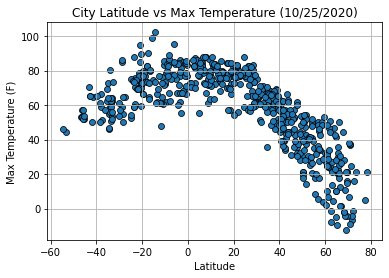

In [17]:
plt.scatter(city_data["City Latitude"], city_data["Max Temperature (F)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("LatitudevsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

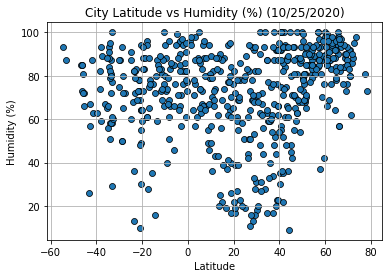

In [18]:
plt.scatter(city_data["City Latitude"], city_data["Humidity (%)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (%) (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("LatitudevsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

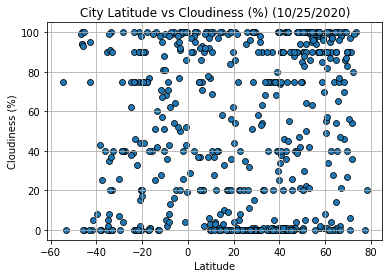

In [19]:
plt.scatter(city_data["City Latitude"], city_data["Cloud Coverage (%)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Cloudiness (%) (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("LatitudevsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

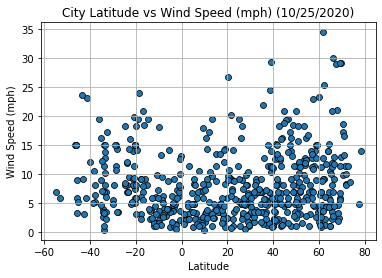

In [20]:
plt.scatter(city_data["City Latitude"], city_data["Wind Speed (mph)"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Wind Speed (mph) (10/25/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("LatitudevsWind.png")
plt.show()

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames

In [22]:
north_cities = clean_city_data.loc[clean_city_data["City Latitude"]>0]
north_cities

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
0,port blair,11.67,92.75,84.07,84.07,74.0,4.0,8.28,IN,1.604202e+09
2,saint george,37.10,-113.58,59.09,60.80,17.0,1.0,3.36,US,1.604202e+09
6,staryy nadym,65.61,72.68,29.64,29.64,98.0,65.0,11.81,RU,1.604202e+09
8,hambantota,6.12,81.12,84.85,84.85,67.0,71.0,3.27,LK,1.604202e+09
9,saskylakh,71.92,114.08,-6.63,-6.63,86.0,36.0,8.19,RU,1.604202e+09
...,...,...,...,...,...,...,...,...,...,...
562,bati,27.20,60.68,59.00,59.00,11.0,0.0,4.70,IR,1.604202e+09
563,sataua,50.12,9.90,48.65,50.00,99.0,100.0,1.01,DE,1.604202e+09
564,madimba,50.17,20.99,37.36,39.00,96.0,0.0,5.21,PL,1.604202e+09
565,nioro,61.77,31.02,33.94,33.94,91.0,0.0,3.56,RU,1.604202e+09


In [23]:
south_cities = clean_city_data.loc[clean_city_data["City Latitude"]<0]
south_cities

,City,City Latitude,City Longitude,Temperature (F),Max Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),City Country,City Datetime
1,kakonko,-3.28,30.96,61.97,61.97,85.0,50.0,0.89,TZ,1.604202e+09
3,rikitea,-23.12,-134.97,75.90,75.90,72.0,0.0,9.44,PF,1.604202e+09
4,punta arenas,-53.15,-70.92,44.60,44.60,87.0,0.0,5.82,CL,1.604202e+09
5,hermanus,-34.42,19.23,55.00,55.00,84.0,8.0,4.00,ZA,1.604202e+09
7,cape town,-33.93,18.42,58.28,59.00,58.0,0.0,14.99,ZA,1.604202e+09
...,...,...,...,...,...,...,...,...,...,...
552,hofn,-3.28,-39.27,79.02,79.02,82.0,92.0,9.08,BR,1.604202e+09
555,nohar,-11.18,-61.90,73.04,73.04,69.0,95.0,0.92,BR,1.604202e+09
557,saint-augustin,-33.04,-71.63,51.80,51.80,100.0,90.0,2.24,CL,1.604202e+09
566,baturaja,-16.81,26.95,63.79,63.79,65.0,0.0,7.90,ZM,1.604202e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

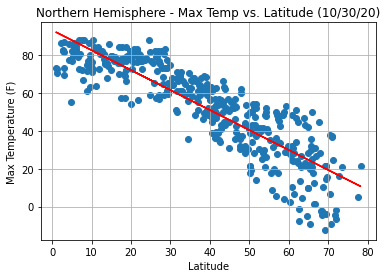

Linear Equation is : y = -1.05 x + 93.14
The r-value is: -0.874070028504606
The p-value is: 7.411632502246848e-127


In [24]:
n_lat = north_cities["City Latitude"]
n_max_temp = north_cities["Max Temperature (F)"]
plt.scatter(n_lat, n_max_temp)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Max Temp vs. Latitude (10/30/20)")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_max_temp)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_max_tempvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

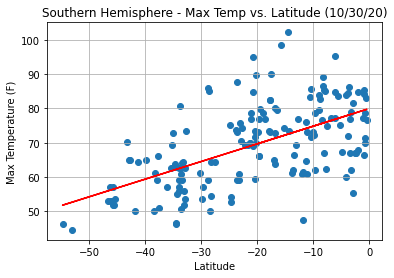

Linear Equation is : y = 0.51 x + 79.99
The r-value is: 0.5860529135336278
The p-value is: 1.0878725020482927e-16


In [25]:
s_lat = south_cities["City Latitude"]
s_max_temp = south_cities["Max Temperature (F)"]
plt.scatter(s_lat, s_max_temp)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Max Temp vs. Latitude (10/30/20)")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_max_temp)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_max_tempvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

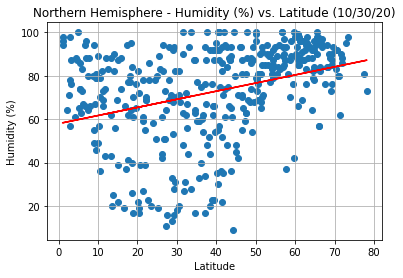

Linear Equation is : y = 0.37 x + 57.93
The r-value is: 0.33506346515071717
The p-value is: 5.977762341301805e-12


In [26]:
n_lat = north_cities["City Latitude"]
n_humidity = north_cities["Humidity (%)"]
plt.scatter(n_lat, n_humidity)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (10/30/20)")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_humidvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

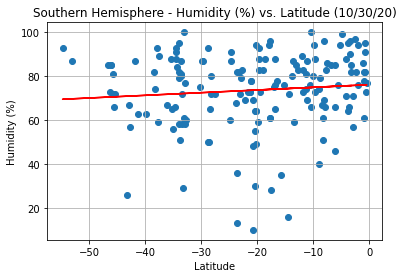

Linear Equation is : y = 0.12 x + 76.13
The r-value is: 0.09443949674637382
The p-value is: 0.226171294629927


In [27]:
s_lat = south_cities["City Latitude"]
s_humidity = south_cities["Humidity (%)"]
plt.scatter(s_lat, s_humidity)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (10/30/20)")
plt.ylabel("Humidity (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_humidvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

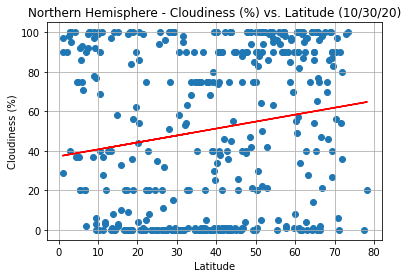

Linear Equation is : y = 0.35 x + 37.22
The r-value is: 0.17083213048664192
The p-value is: 0.0006009046910681663


In [28]:
n_lat = north_cities["City Latitude"]
n_cloud = north_cities["Cloud Coverage (%)"]
plt.scatter(n_lat, n_cloud)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (10/30/20)")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_cloud)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_cloudvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

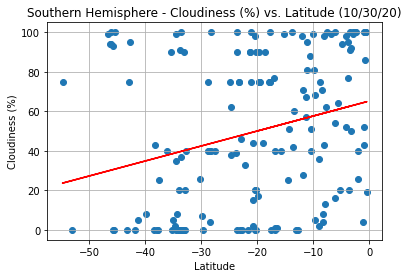

Linear Equation is : y = 0.76 x + 65.23
The r-value is: 0.2681399552476838
The p-value is: 0.0004779460579538677


In [29]:
s_lat = south_cities["City Latitude"]
s_cloud = south_cities["Cloud Coverage (%)"]
plt.scatter(s_lat, s_cloud)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (10/30/20)")
plt.ylabel("Cloudiness (%)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_cloud)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_cloudvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

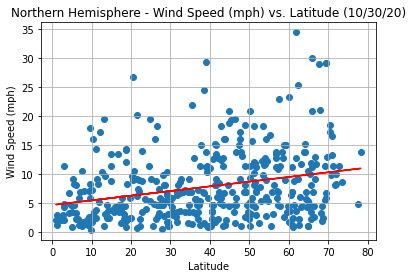

Linear Equation is : y = 0.08 x + 4.63
The r-value is: 0.2681284156181068
The p-value is: 5.156688385228936e-08


In [30]:
n_lat = north_cities["City Latitude"]
n_wind = north_cities["Wind Speed (mph)"]
plt.scatter(n_lat, n_wind)
plt.xlabel("Latitude")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/20)")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat, n_wind)
regress_values = n_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(n_lat, regress_values,"r-")
plt.grid()
plt.savefig("north_windvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

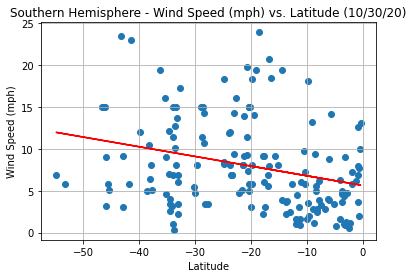

Linear Equation is : y = -0.12 x + 5.62
The r-value is: -0.28876704540942405
The p-value is: 0.000161238005173759


In [31]:
s_lat = south_cities["City Latitude"]
s_wind = south_cities["Wind Speed (mph)"]
plt.scatter(s_lat, s_wind)
plt.xlabel("Latitude")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (10/30/20)")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat, s_wind)
regress_values = s_lat * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.plot(s_lat, regress_values,"r-")
plt.grid()
plt.savefig("south_windvslat.png")
plt.show()
print(f"Linear Equation is : {line_eq}")
print(f"The r-value is: {rvalue}")
print(f"The p-value is: {pvalue}")

## Observed Trends

*From the Latitude vs Temperature plot, we can infer that as the latitude increases the temperature decreases. Around zero latitude (Equator) the temperatures are the highest. 

*In the southern hemisphere as the latitude increases the so does the temperature as the amount of sunlight changes with the seasons. In the northern hemisphere as the latitude increases the temperature decreases because higher latitudes receive less heat than lower latitude areas nearer the equator at this time of the year.

*It seems to exist some correlation between latitude and humidity in the northern hemisphere considering the r and p values. More studies should be done about it.
